### Importing Libraries

  - `pandas` as `pd` for data manipulation and analysis.
  - `numpy` as `np` for numerical operations.
  - `matplotlib.pyplot` as `plt` for creating visualizations.
  - `ast` for safely evaluating strings into python objects.
  - `seaborn` as `sns` for statistical data visualization and enhanced plotting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

### Loading Data

- **Reading CSV File:** reading a csv file into a dataframe named `df`, which is used for data analysis and manipulation.


In [2]:
df = pd.read_csv(r'D:\Python\Files\data_jobs.csv')
df.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
369957,Data Engineer,Big Data Developer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-02-20 23:18:17,True,False,Australia,NaN,NaN,NaN,INNOVATE IT AUSTRALIA,"['sql', 'python', 'hadoop', 'spark']","{'libraries': ['hadoop', 'spark'], 'programmin..."
346042,Data Engineer,Data Engineer,"Padula, SA, Italy",via Sercanto,Full-time,False,Italy,2023-01-05 23:32:07,False,False,Italy,NaN,NaN,NaN,Experis,NaN,NaN


### Data Cleanup

- **Renaming Columns:** assigning new column names to the dataframe.

- **Converting Dates:** using `pd.to_datetime()` to change the 'posted_dt' column from string to datetime format.

- **Converting Skills:**
  - using `.apply() `function to convert 'skills' from string to list format by applying a custom function to  every row of a dataFrame.
  - using `ast.literal_eval()` to evaluate and convert strings to python objects.
  - ensuring conversion only happens if the value is not missing using `pd.notna(gg)`.

- **Handling Missing Values:** optionally dropping rows with missing values in the 'salyr' column using `df.dropna()` (commented out).

In [3]:
new_columns = ['job', 'full_name', 'location', 'via', 'schedule', 'work_from_home','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt']) 
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)
df.dropna(subset=['salyr'],inplace=True)

### Sample

- Random sample of 2 rows from the modified dataFrame `df`

In [4]:
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
302838,Data Scientist,Data Scientist,"Newark, NJ",via Indeed,Full-time,False,"New York, United States",2023-12-14 17:02:05,False,False,United States,year,93100.0,NaN,PSEG,"[sql, sas, sas, python, r]","{'analyst_tools': ['sas'], 'programming': ['sq..."
259908,Data Scientist,DATA SCIENTIST,"Pittsburgh, PA",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-07-21 07:04:47,False,False,United States,year,71402.0,NaN,U.S. Army Cyber Command,"[r, python, scala, java, julia, c++, aws, azur...","{'cloud': ['aws', 'azure'], 'libraries': ['had..."


# For Data Analysts in India

### Filtering and Exploding

- **Filtering DataFrame:** filtering the dataframe to include only rows where the job title is `'data analyst'` and the country is `'india'`, creating a new dataframe `df_ind`.

- **Exploding Skills Column:** exploding the `skills` column in `df_ind` to create a row for each skill, resulting in a new dataframe `df_ind_exp`.


In [5]:
df_ind = df[(df['job']== 'Data Analyst') & (df['country']== 'India')].copy()
df_ind_exp = df_ind.explode('skills')
df_ind_exp.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
743931,Data Analyst,Sr. Enterprise Data Analyst,India,via Ai-Jobs.net,Full-time,False,India,2023-12-21 20:10:10,False,False,India,year,118140.0,NaN,ACA Group,azure,"{'analyst_tools': ['power bi', 'excel'], 'clou..."
525869,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via Ai-Jobs.net,Full-time,False,India,2023-04-27 11:13:53,True,False,India,year,111175.0,NaN,ChargePoint,slack,"{'analyst_tools': ['tableau', 'powerpoint', 'e..."


### Grouping and Sorting

- **Grouping Data:** grouping the `df_ind_exp` dataframe by the `skills` column and calculating the median and count of salaries (`salyr`) for each skill.

- **Sorting Results:** sorting the results by the count of each skill in descending order and storing the result in `df_ind_table`.


In [6]:
df_ind_table = df_ind_exp.groupby('skills')['salyr'].agg(['median', 'count']).sort_values(by='count', ascending=False)

### Calulating Skill Percentages

- dividing the count of each skill by the total number of data analyst job postings in india (`len(df_ind)`) and multiplying by 100 to get the percentage. adding this percentage as a new column `skill_percent` to the `df_ind_table` dataframe.

In [7]:
df_ind_table['skill_percent'] = df_ind_table['count']/len(df_ind) * 100
df_ind_table

,median,count,skill_percent
skills,,,
sql,96050.0,46,48.936170
excel,98500.0,39,41.489362
python,96050.0,36,38.297872
tableau,108087.5,20,21.276596
r,79200.0,18,19.148936
...,...,...,...
postgresql,165000.0,1,1.063830
ms access,64600.0,1,1.063830
mysql,165000.0,1,1.063830


### Building a Unified List of Technology Skills

- **Creating a Copy:** creating a copy of the `skilltype` column from the `df_ind` dataframe and assigning it to `df_tech`.

- **Removing Duplicates:** removing duplicate entries from `df_tech` to ensure each skill type appears only once.

- **Removing NaN Values:** removing NaN values from `df_tech` to eliminate any missing data.

- **Initializing Dictionary:** initializing an empty dictionary `tech_dict` to store the combined skill types.

- **Updating Dictionary:**
  - iterating through each row in `df_tech`, converting each string to a dictionary.
  - updating `tech_dict` by aggregating values for each key if the key already exists; otherwise, adding the new key and its values.

- **Removing Duplicate Values:** removing duplicate values for each key in `tech_dict` by converting the list of values to a set (which automatically removes duplicates) and then back to a list.

In [8]:
df_tech = df_ind['skilltype'].copy()

# remove duplicates
df_tech = df_tech.drop_duplicates()

# remove NaN values
df_tech = df_tech.dropna()

# combine all dictionaries into one
tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in tech_dict:  # if key already exists in tech_dict, add value to existing value
            tech_dict[key] += value
        else:                       # if key does not exist in tech_dict, add key and value
            tech_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

tech_dict

{'analyst_tools': ['visio',
  'outlook',
  'ms access',
  'spss',
  'sheets',
  'powerpoint',
  'alteryx',
  'tableau',
  'sas',
  'sap',
  'power bi',
  'word',
  'looker',
  'sharepoint',
  'qlik',
  'excel',
  'ssis',
  'dax'],
 'cloud': ['redshift',
  'aws',
  'azure',
  'databricks',
  'snowflake',
  'oracle',
  'bigquery',
  'gcp'],
 'other': ['flow',
  'jenkins',
  'gitlab',
  'git',
  'docker',
  'kubernetes',
  'bitbucket',
  'terminal',
  'github',
  'unreal'],
 'programming': ['mongo',
  'sql',
  'shell',
  'vba',
  'go',
  'mongodb',
  'python',
  'sas',
  'scala',
  'java',
  'r',
  't-sql',
  'swift',
  'bash',
  'nosql',
  'no-sql',
  'c'],
 'databases': ['cassandra',
  'mongodb',
  'sql server',
  'elasticsearch',
  'db2',
  'neo4j',
  'mysql',
  'dynamodb',
  'postgresql'],
 'libraries': ['electron',
  'hadoop',
  'pandas',
  'plotly',
  'spark',
  'spring',
  'airflow',
  'matplotlib',
  'numpy',
  'gdpr',
  'pytorch',
  'pyspark',
  'tensorflow',
  'kafka'],
 'async'

### Transforming Dictionary into a DataFrame

- **Converting Dictionary:** converting the `tech_dict` dictionary into a dataframe `df_tech`, where each key-value pair becomes a row with columns `technology` and `skills`.

- **Exploding Skills:** exploding the `skills` column in `df_tech` to create a new row for each skill, resulting in a dataframe where each skill type has its own row.


In [9]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])
df_tech = df_tech.explode('skills')
df_tech

,technology,skills
0,analyst_tools,visio
0,analyst_tools,outlook
0,analyst_tools,ms access
0,analyst_tools,spss
0,analyst_tools,sheets
...,...,...
7,os,unix
8,sync,slack
8,sync,unify
8,sync,zoom


### Merging DataFrames

-  merging the `df_ind_table` dataframe with the `df_tech` dataframe on the `skills` column. this combines the skill counts and median salaries from `df_ind_table` with the corresponding technology information from `df_tech`, resulting in a dataframe `df_ind_table_tech` that includes both the skill statistics and their associated technology types.


In [10]:
df_ind_table_tech = df_ind_table.merge(df_tech, left_on='skills', right_on='skills')
df_ind_table_tech

,skills,median,count,skill_percent,technology
0,sql,96050.0,46,48.936170,programming
1,excel,98500.0,39,41.489362,analyst_tools
2,python,96050.0,36,38.297872,programming
3,tableau,108087.5,20,21.276596,analyst_tools
4,r,79200.0,18,19.148936,programming
...,...,...,...,...,...
80,postgresql,165000.0,1,1.063830,databases
81,ms access,64600.0,1,1.063830,analyst_tools
82,mysql,165000.0,1,1.063830,databases
83,neo4j,163782.0,1,1.063830,databases


### Filtering and Setting Index for Skills

- **Filtering DataFrame:** filtering the `df_ind_table_tech` dataframe to include only rows where the `skill_percent` is greater than 5. this creates a new dataframe `df_ind_plot` with skills that have a percentage greater than 5.

- **Setting Index:** setting the `skills` column as the index of the `df_ind_plot` dataframe, which reposition the skills as the row index for easier analysis and plotting.


In [11]:
df_ind_plot = df_ind_table_tech[df_ind_table_tech['skill_percent'] > 5]
df_ind_plot.set_index('skills', inplace= True)
df_ind_plot

,median,count,skill_percent,technology
skills,,,,
sql,96050.00,46,48.936170,programming
excel,98500.00,39,41.489362,analyst_tools
python,96050.00,36,38.297872,programming
tableau,108087.50,20,21.276596,analyst_tools
r,79200.00,18,19.148936,programming
power bi,111175.00,17,18.085106,analyst_tools
azure,93600.00,15,15.957447,cloud
aws,79200.00,12,12.765957,cloud
oracle,79200.00,11,11.702128,cloud


### Plotting

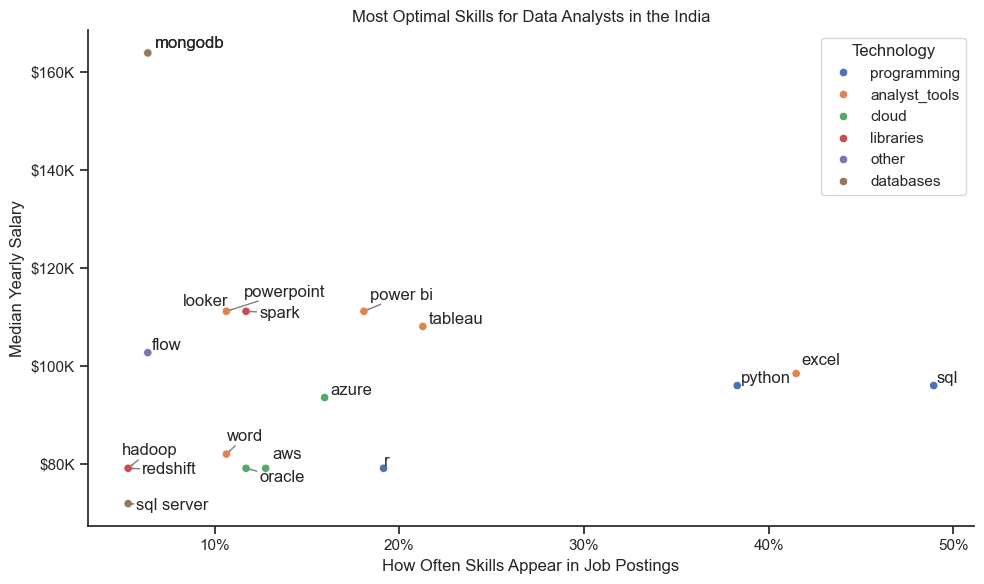

In [12]:

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Setting Up for Plot
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

# Creating Plot
sns.scatterplot(
    data=df_ind_plot,
    x='skill_percent',
    y='median',
    hue='technology'
)

# Prepareing texts for adjustText
texts = []
for i, txt in enumerate(df_ind_plot.index):
    texts.append(plt.text(df_ind_plot['skill_percent'].iloc[i], df_ind_plot['median'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Modifying Axes and Labels
plt.xlabel('How Often Skills Appear in Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the India')
plt.legend(title='Technology')

# Formating axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) # to convert 100000 to $100k at x-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0)) # to add % sign

# Display plot 
sns.despine()
plt.tight_layout()
plt.show()


# For Top 4 Data Jobs in India

### Getting Top 4 Job Titles and Specified Countries

- **Finding Top Job Titles:** counting occurrences to find the top four most common job titles in the dataframe and selecting the most frequent ones. converting these job titles to a list and assigning it to `top4_jobs`.

- **Creating Job Country List:** creating a list named `job_country` containing the string `'India'`, which can be used for filtering or analysis related to job data in India.


In [13]:
top4_jobs = df['job'].value_counts().head(4).index.to_list()
job_country = ['India']

print(top4_jobs)
print(job_country)

['Data Scientist', 'Data Analyst', 'Data Engineer', 'Senior Data Scientist']
['India']


### Generating Skill Data for Top 4 Job Titles in India

In [14]:

dict_df = {}
for i in top4_jobs:

    df_da = df[(df['job']== i) & (df['country']== 'India' )].copy()
    df_da_exp = df_da.explode('skills')
    df_da_table = df_da_exp.groupby('skills')['salyr'].agg(['median', 'count']).sort_values(by='count', ascending=False)
    df_da_table['skill_percent'] = df_da_table['count']/len(df_da) * 100


    df_tech = df_da['skilltype'].copy()
    df_tech = df_tech.drop_duplicates()
    df_tech = df_tech.dropna()
    
    tech_dict = {}
    for row in df_tech:
        row_dict = ast.literal_eval(row)  # convert string to dictionary
        for key, value in row_dict.items():
            if key in tech_dict:  # if key already exists in tech_dict, add value to existing value
                tech_dict[key] += value
            else:                       # if key does not exist in tech_dict, add key and value
                tech_dict[key] = value
    for key, value in tech_dict.items():
        tech_dict[key] = list(set(value))


    df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])
    df_tech = df_tech.explode('skills')

    df_da_table_tech = df_da_table.merge(df_tech, left_on='skills', right_on='skills')

    df_da_plot = df_da_table_tech[df_da_table_tech['skill_percent'] > 15] if i != 'Data Engineer' else df_da_table_tech[df_da_table_tech['count'] > 40]
    df_da_plot.set_index('skills', inplace= True)


    dict_df[i] = df_da_plot


### Accessing Skills Data for Data Engineer Jobs in India

In [15]:
dict_df['Senior Data Scientist']

,median,count,skill_percent,technology
skills,,,,
python,153576.5,16,48.484848,programming
sql,152500.0,14,42.424242,programming
aws,126550.0,9,27.272727,cloud
excel,157500.0,9,27.272727,analyst_tools
azure,79200.0,7,21.212121,cloud
tableau,157500.0,7,21.212121,analyst_tools
spark,79200.0,7,21.212121,libraries
scala,79200.0,6,18.181818,programming
java,79200.0,6,18.181818,programming


### Plotting

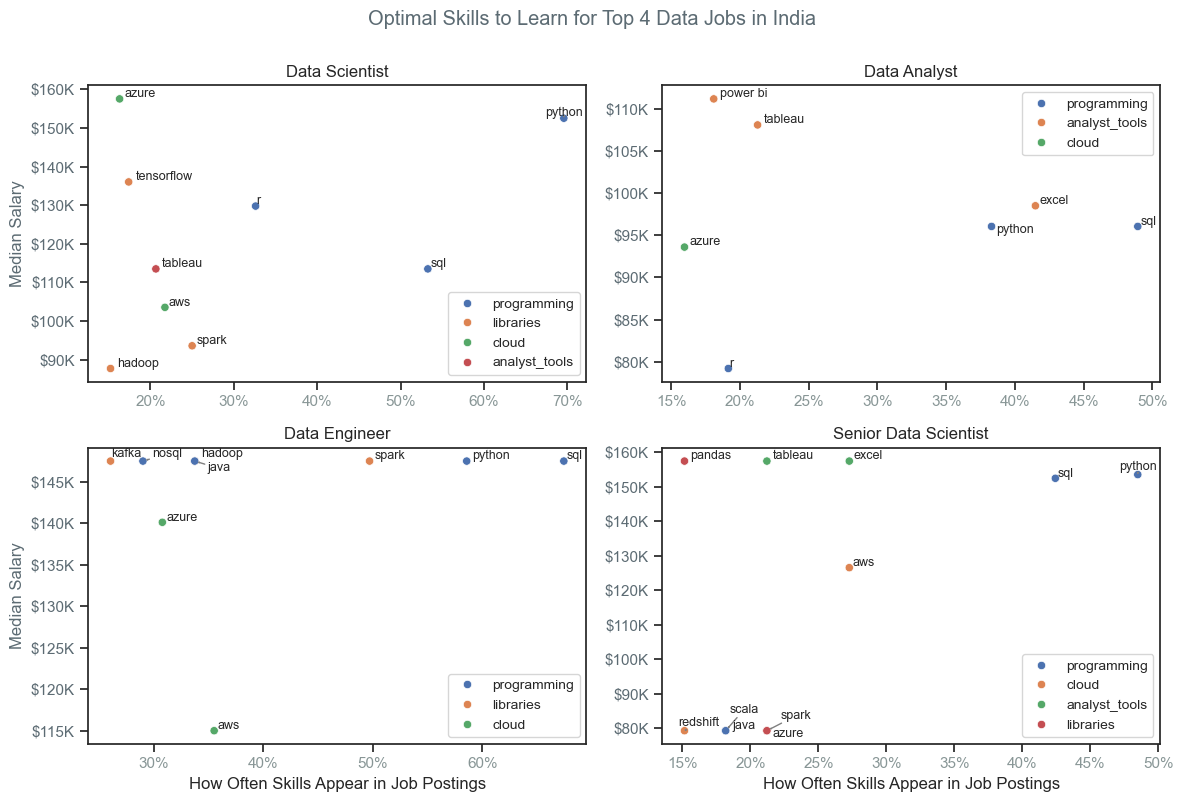

In [16]:

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Setting Up for Plot
fig, ax = plt.subplots(2, 2, figsize= (12,8)) 
positions = [(0, 0), (0, 1), (1, 0), (1, 1)] 

# Creating Plot
for index, (key, value) in enumerate(dict_df.items()):
    if index < len(positions):
        i, j = positions[index]
        sns.scatterplot(data=value, x='skill_percent', y='median', hue='technology', ax=ax[i, j])

        # Prepareing texts for adjustText
        texts = []
        for p, txt in enumerate(value.index):
            texts.append(ax[i,j].text(value['skill_percent'].iloc[p], value['median'].iloc[p], txt, fontsize=9))

        # Adjusting text to avoid overlap
        adjust_text(texts,ax=ax[i,j],arrowprops=dict(arrowstyle='->', color='gray'))

        # Modify Axes and Labels
        ax[i,j].xaxis.set_major_formatter(PercentFormatter(decimals=0))
        ax[i, j].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
        ax[i,j].set_title(key)
        ax[i, j].legend(fontsize='small')
        # Set the color of x-axis and y-axis ticks
        ax[i,j].tick_params(axis='x', labelcolor='#889696')
        ax[i,j].tick_params(axis='y', labelcolor='#5c6b73')

# Modifying Axes and Labels
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('How Often Skills Appear in Job Postings')
ax[1,1].set_xlabel('How Often Skills Appear in Job Postings')
ax[0,0].set_ylabel('Median Salary', color = '#5c6b73')
ax[1,0].set_ylabel('Median Salary', color = '#5c6b73')
ax[0,1].set_ylabel('')
ax[1,1].set_ylabel('')

 
# Modifying the entire figure
plt.suptitle('Optimal Skills to Learn for Top 4 Data Jobs in India',y=1, color = '#5c6b73')

# Displaying the plot
plt.tight_layout()
plt.show()

<span style="color:#d7ba7d; font-size:50px;"> End </span>

---